In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
project_path = os.getcwd() + '/../'
sys.path.append(project_path + "utils")

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

/Users/admin/Desktop/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import function
import preprocessing
import local_bayes
import visualize

In [4]:
sys.path.append(project_path + "models/cnn")

In [5]:
p = preprocessing.Preprocessing(data_dir = "../original_data/bookmark/")

# data load

In [6]:
data_dir = "../original_data/TwtHtag/"
data = open(data_dir + 'TwtHtag.txt')

In [7]:
data_dir = "../original_data/TwtHtag/"
data = open(data_dir + 'TwtHtag.txt')

desc_dict_ls, ts_ls = [], []
key_ls = ['ID', 'Content', 'BeginTm', 'NumQr', 'PeakTm']
for i, line in enumerate(data):      
    if i % 2 == 0:
        desc_dict = {}
        for key, ele in zip(key_ls, line.rstrip().split("\t")):
            desc_dict.update({'%s' % key:ele})
        desc_dict_ls.append(desc_dict)
    else:
        ts = line.rstrip().split("\t")
        int_ts = []
        for ele in ts:
            int_ts.append(float(ele))
        ts_ls.append(int_ts)

In [8]:
len(ts_ls[39])

128

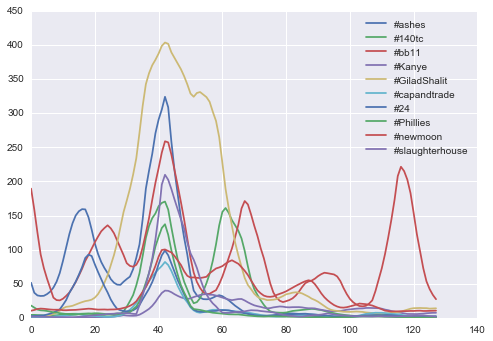

In [9]:
for i in xrange(100, 110):
    plt.plot(ts_ls[i], label=desc_dict_ls[i]['Content'])
    plt.legend()

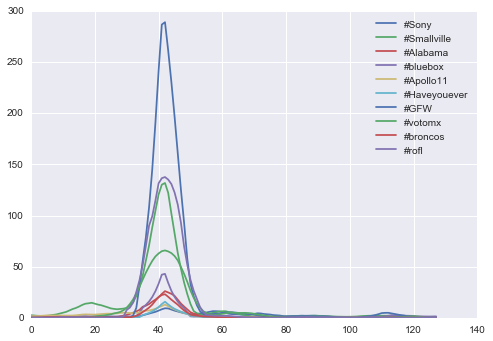

In [10]:
for i in xrange(590, 600):
    plt.plot(ts_ls[i], label=desc_dict_ls[i]['Content'])
    plt.legend()

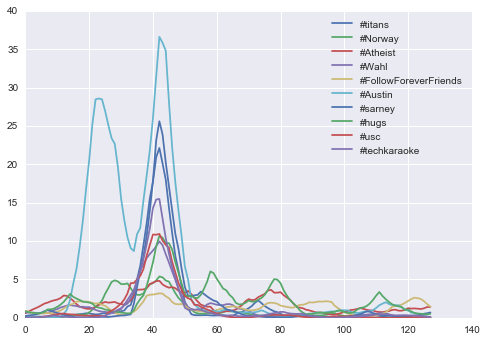

In [11]:
for i in xrange(810, 820):
    plt.plot(ts_ls[i], label=desc_dict_ls[i]['Content'])
    plt.legend()

In [12]:
data_name = 'TwtHtag'
category_input_ts, category_label, category_input_sum = p.make_supervised_data(ts_ls, stride=5)
x, label = p.balancing_sampling(category_input_ts, category_label)
save_data_dir = '../data/%s/' % data_name
os.mkdir(save_data_dir)
p.make_test_dataset(x, label, save_data_dir)

TypeError: make_supervised_data() takes at least 3 arguments (3 given)

# model training

In [16]:
import cnn

In [20]:
epoch_num = 200
save_data_dir = '../data/TwtHtag/'
save_model_dir = "../models/cnn/results/TwtHtag_%s/" % epoch_num
os.mkdir("../models/cnn/results/TwtHtag_%s" % epoch_num)
train_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [21]:
train_0_0['x'].shape

(7729, 30)

In [22]:
cnntrain.train(train_0_0, test_0_0)

epoch 1
graph generated
train mean loss=1.43245822104, accuracy=0.76892223751, throughput=1110.6116881 images/sec
test  mean loss=0.734949802575, accuracy=0.79813664115
epoch 2
train mean loss=0.612216062365, accuracy=0.797127697944, throughput=970.696012723 images/sec
test  mean loss=0.517778688274, accuracy=0.81625258287
epoch 3
train mean loss=0.518534892982, accuracy=0.808642769896, throughput=1039.73652436 images/sec
test  mean loss=0.658056805963, accuracy=0.799171835801
epoch 4
train mean loss=0.495799746249, accuracy=0.819899076184, throughput=1011.50463014 images/sec
test  mean loss=0.456897806214, accuracy=0.842650098892
epoch 5
train mean loss=0.437137878058, accuracy=0.818734630189, throughput=897.577239468 images/sec
test  mean loss=0.578806298243, accuracy=0.761387163006
epoch 6
train mean loss=0.431808279717, accuracy=0.820934140292, throughput=935.623654454 images/sec
test  mean loss=0.468980826761, accuracy=0.799171835863
epoch 7
train mean loss=0.413847843203, accurac